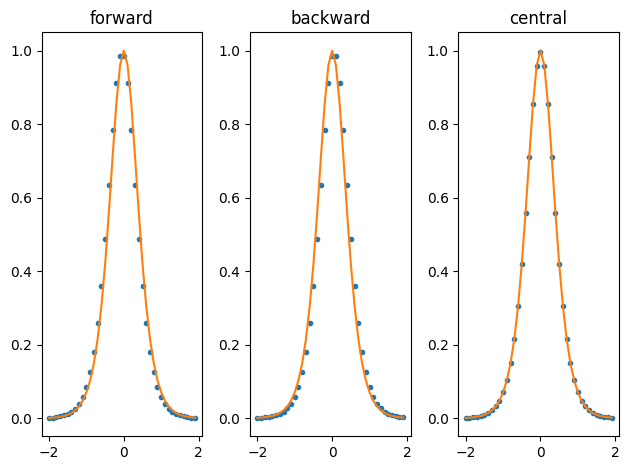

In [ ]:
from pylab import *

def forward(f,x,h=1e-4):
  return (f(x+h)-f(x))/h

def backward(f,x,h=1e-4):
  return (f(x)-f(x-h))/h

def derivada(f,x,h=1e-4):
  return(f(x+h/2)-f(x-h/2))/h
f=lambda x:1+0.5*tanh(2*x)
lista_forward=[]
lista_backward=[]
lista_derivada=[]
x=arange(-2,2,0.1)
for i in x:
  lista_forward.append(forward(f,i,1e-1))
  lista_backward.append(backward(f,i,1e-1))
  lista_derivada.append(derivada(f,i,1e-1))

subplot(1,3,1)
plot(x,lista_forward,".")
plot(x,(1-tanh(2*x)**2))
title("forward")

subplot(1,3,2)
plot(x,lista_backward,".")
plot(x,(1-tanh(2*x)**2))
title("backward")

subplot(1,3,3)
plot(x,lista_derivada,".")
plot(x,(1-tanh(2*x)**2))
title("central")

tight_layout()
show()

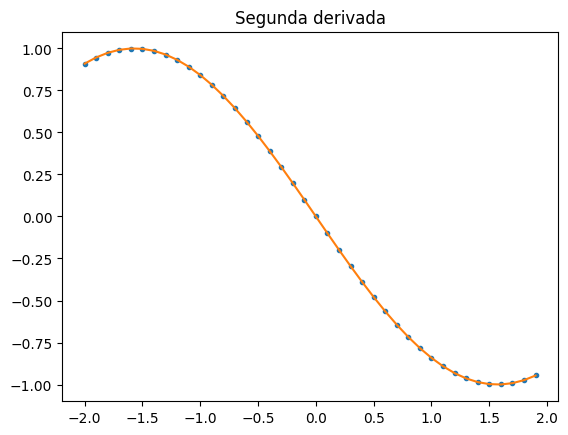

In [ ]:
def derivada_2(f,x,h=1e-4):
  return(f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:sin(x)

lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
  lista_derivada_2.append(derivada_2(f,i,1e-1))

plot(x,lista_derivada_2,".")
plot(x,(-sin(x)))
title("Segunda derivada")
show()

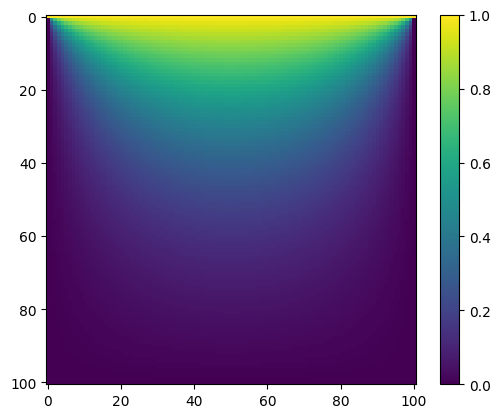

In [ ]:
#ejercicio de electro

from pylab import *
N,V=100,1.0
#ponemos el numero maximo de iteraciones
maxIter=5000
phi=zeros([N+1,N+1],float)
phi[0,:]=V
phi_1=zeros([N+1,N+1],float)
delta=1.0
for iteraciones in range (0, maxIter):
  for i in range(N):
    for j in range(N):
      if i==0 or i==N  or j==0 or j==N:
        phi_1[i,j]=phi[i,j]
      else:
        phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

  phi,phi_1=phi_1,phi

imshow(phi)
colorbar()
# gray()
show()

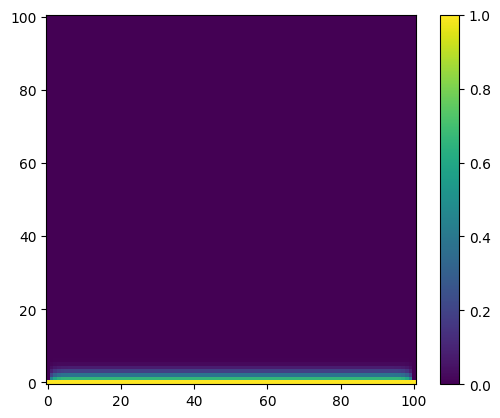

In [ ]:
#ejercicio de electro

from pylab import *
N,V=100,1.0
#ponemos el numero maximo de iteraciones
maxIter=10
phi=zeros([N+1,N+1],float)
#
phi[0,:]=V
phi_1=zeros([N+1,N+1],float)
delta=1.0
for iteraciones in range (0, maxIter):
  for i in range(N):
    for j in range(N):
      if i==0 or i==N  or j==0 or j==N:
        phi_1[i,j]=phi[i,j]
      else:
        phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

  phi,phi_1=phi_1,phi

imshow(phi)
colorbar()
# gray()
imshow(phi,origin="lower")

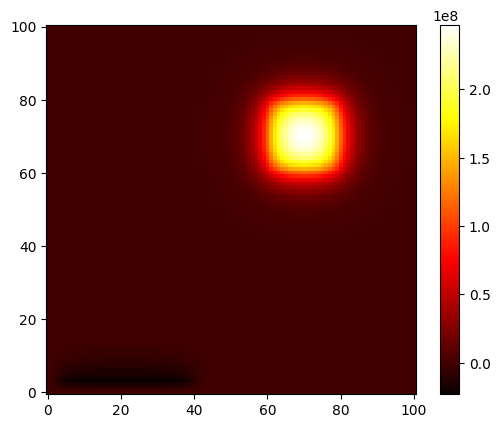

--- 2.535773515701294 segundos ---


In [ ]:
from pylab import *
import time
t0 = time.time()
M,V=100,1.0

def ro2(x, y):
    if x > 0.6 and x < 0.8 and y > 0.6 and y < 0.8:
        return 1
    elif x > 0.02 and x < 0.04 and y > 0.02 and y < 0.4:
        return -1
    else:
        return 0

# Ponemos el numero maximo de iteraciones
maxIter = 100
phi = zeros([M+1, M+1], float)
#phi[0,:] = V
phi_1 = zeros([M+1, M+1], float)
a = 0.01
epsilon = 8.85e-12

for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i == 0 or i == M or j == 0 or j == M:
                phi_1[i, j] = phi[i, j]  # frontera
            else:
                phi_1[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) / 4 + (a**2) / (4 * epsilon) * ro2(i*a, j*a)

    phi, phi_1 = phi_1, phi  # actualizo los valores

imshow(phi, origin='lower')
#set cmap("Blues r") #inferno set cmap ("cool")
set_cmap("hot")
colorbar()
show()
print("--- %s segundos ---" % (time.time() - t0))